In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

## airlines_full

In [ ]:
#airlines = pd.read_csv('airlines.csv')
#airlines = pd.read_csv('/content/T_T100I_MARKET_US_CARRIER_ONLY.csv')
airlines = pd.read_csv('/content/T_T100I_SEGMENT_US_CARRIER_ONLY.csv')

airlines.columns = airlines.columns.str.lower()
airlines.head()

departures_scheduled  departures_performed  seats  passengers  distance  \
0                   0.0                   0.0    0.0         0.0     103.0   
1                   0.0                   0.0    0.0         0.0     103.0   
2                   0.0                   0.0    0.0         0.0     103.0   
3                   0.0                   0.0    0.0         0.0     103.0   
4                   0.0                   0.0    0.0         0.0     103.0   

  unique_carrier unique_carrier_name  origin_airport_id origin origin_country  \
0             9K            Cape Air              14843    SJU             US   
1             9K            Cape Air              14843    SJU             US   
2             9K            Cape Air              14843    SJU             US   
3             9K            Cape Air              14843    SJU             US   
4             9K            Cape Air              14843    SJU             US   

   dest_airport_id dest dest_country  aircraft_type  year  month  
0            15598  VIJ           VG            125  2022      6  
1            15598  VIJ           VG            125  2022      7  
2            15598  VIJ           VG            125  2022      8  
3            15598  VIJ           VG            125  2022     10  
4            15598  VIJ           VG            125  2022     11

In [ ]:
airports = pd.read_csv('airports.csv')
airports.head()

id                                         name          city  \
0   1                               Goroka Airport        Goroka   
1   2                               Madang Airport        Madang   
2   3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3   4                               Nadzab Airport        Nadzab   
4   5  Port Moresby Jacksons International Airport  Port Moresby   

            country iata  icao       lat         lon   alt timezone dst  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998  5282       10   U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001    20       10   U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005  5388       10   U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977   239       10   U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001   146       10   U   

                     tz     type       source  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_Moresby  airport  OurAirports  
2  Pacific/Port_Moresby  airport  OurAirports  
3  Pacific/Port_Moresby  airport  OurAirports  
4  Pacific/Port_Moresby  airport  OurAirports

In [ ]:
merged = pd.merge(airlines, airports, left_on='origin', right_on='iata', how='left')
airlines_full = pd.merge(merged, airports, left_on='dest', right_on='iata', how='left', suffixes=('_origin', '_dest'))
airlines_full.head()

departures_scheduled  departures_performed  seats  passengers  distance  \
0                   0.0                   0.0    0.0         0.0     103.0   
1                   0.0                   0.0    0.0         0.0     103.0   
2                   0.0                   0.0    0.0         0.0     103.0   
3                   0.0                   0.0    0.0         0.0     103.0   
4                   0.0                   0.0    0.0         0.0     103.0   

  unique_carrier unique_carrier_name  origin_airport_id origin origin_country  \
0             9K            Cape Air              14843    SJU             US   
1             9K            Cape Air              14843    SJU             US   
2             9K            Cape Air              14843    SJU             US   
3             9K            Cape Air              14843    SJU             US   
4             9K            Cape Air              14843    SJU             US   

   ...  iata_dest icao_dest lat_dest   lon_dest  alt_dest  timezone_dest  \
0  ...        VIJ      TUPW  18.4464 -64.427498       9.0             -4   
1  ...        VIJ      TUPW  18.4464 -64.427498       9.0             -4   
2  ...        VIJ      TUPW  18.4464 -64.427498       9.0             -4   
3  ...        VIJ      TUPW  18.4464 -64.427498       9.0             -4   
4  ...        VIJ      TUPW  18.4464 -64.427498       9.0             -4   

   dst_dest          tz_dest type_dest  source_dest  
0         U  America/Tortola   airport  OurAirports  
1         U  America/Tortola   airport  OurAirports  
2         U  America/Tortola   airport  OurAirports  
3         U  America/Tortola   airport  OurAirports  
4         U  America/Tortola   airport  OurAirports  

[5 rows x 44 columns]

In [ ]:
airlines_full = airlines_full.dropna(subset=['lat_origin', 'lon_origin', 'lat_dest', 'lon_dest'])
# airlines_full = airlines_full[['year', 'month', 'day', 'origin', 'dest', 'flight', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'lat_origin', 'lon_origin', 'lat_dest', 'lon_dest']]

In [ ]:
airlines_full.rename(columns={'origin': 'airport_origin', 'dest': 'airport_dest'}, inplace=True)

In [ ]:
"""# converting sched_dep_time to 'std' - Scheduled time of departure
airlines_full['std'] = airlines_full.dep_time.astype(str).str[:2] + ':' + airlines_full.dep_time.astype(str).str[2:4] + ':00'

# converting sched_arr_time to 'sta' - Scheduled time of arrival
airlines_full['sta'] = airlines_full.arr_time.astype(str).str[:2] + ':' + airlines_full.arr_time.astype(str).str[2:4] + ':00'

# date
airlines_full['date'] = pd.to_datetime(airlines_full[['year', 'month', 'day']])

# dropping the year, month and day columns
airlines_full.drop(['year', 'month', 'day'], axis=1, inplace=True)"""

"# converting sched_dep_time to 'std' - Scheduled time of departure\nairlines_full['std'] = airlines_full.dep_time.astype(str).str[:2] + ':' + airlines_full.dep_time.astype(str).str[2:4] + ':00'\n\n# converting sched_arr_time to 'sta' - Scheduled time of arrival\nairlines_full['sta'] = airlines_full.arr_time.astype(str).str[:2] + ':' + airlines_full.arr_time.astype(str).str[2:4] + ':00'\n\n# date\nairlines_full['date'] = pd.to_datetime(airlines_full[['year', 'month', 'day']])\n\n# dropping the year, month and day columns\nairlines_full.drop(['year', 'month', 'day'], axis=1, inplace=True)"

In [ ]:
airlines_full['airport_origin'].unique()

array(['SJU', 'VIJ', 'MFE', 'AXA', 'STT', 'YVR', 'YOW', 'EWR', 'JFK',
       'YHM', 'YUL', 'ACA', 'GRK', 'CZM', 'MGA', 'MIA', 'YWG', 'YYZ',
       'YXE', 'GYE', 'NAS', 'HEL', 'LAX', 'CVG', 'MSP', 'NBC', 'NKT',
       'YUM', 'YIP', 'YQG', 'APW', 'EIS', 'SIG', 'YXU', 'DTW', 'MTY',
       'LRD', 'SLW', 'BQN', 'SDQ', 'SXM', 'TUS', 'CUU', 'ELP', 'BRO',
       'SKB', 'HAV', 'FWA', 'TRC', 'BED', 'FAI', 'SAT', 'SLP', 'HMO',
       'TAM', 'QRO', 'BJX', 'PAP', 'ORD', 'AGU', 'HOU', 'GCM', 'SDF',
       'PBC', 'TLC', 'EVV', 'PHX', 'MBJ', 'GDL', 'CUN', 'ANC', 'YOC',
       'KTN', 'GSP', 'PLS', 'KIN', 'PVR', 'SKF', 'POS', 'GUM', 'TKK',
       'SHV', 'YAP', 'WRI', 'AUS', 'MID', 'CHS', 'YMX', 'MEX', 'LAF',
       'IAH', 'ROR', 'AZA', 'FLL', 'DAL', 'SAP', 'MEM', 'DFW', 'MCI',
       'PNI', 'GUA', 'YHZ', 'SAL', 'YYC', 'YZF', 'GRI', 'SUS', 'BNA',
       'SJO', 'AFW', 'AEX', 'AUA', 'CHA', 'PTY', 'TCL', 'STL', 'MCO',
       'ANB', 'ATL', 'IND', 'KSA', 'MQY', 'YEG', 'DAY', 'MDE', 'UAM',
       'GDC', 'TYS',

In [ ]:
airlines_full['airport_dest'].unique()

array(['VIJ', 'SJU', 'MTY', 'STT', 'AXA', 'PDX', 'BED', 'YYZ', 'YHM',
       'JFK', 'BWI', 'MFE', 'PVR', 'ATL', 'MIA', 'MGA', 'AFW', 'FLL',
       'BFI', 'SLC', 'GYE', 'HEL', 'SNN', 'NBC', 'USH', 'NKT', 'RIV',
       'EIS', 'YQG', 'YIP', 'PPG', 'PTK', 'YXU', 'DTW', 'LRD', 'SLW',
       'SDQ', 'BQN', 'NAS', 'OPF', 'SXM', 'HMO', 'ELP', 'CUU', 'SKB',
       'HAV', 'DAY', 'TRC', 'YOW', 'YOC', 'FWA', 'EWR', 'BRO', 'DOM',
       'SLP', 'CVG', 'AUS', 'DOV', 'QRO', 'BJX', 'PAP', 'SDF', 'ORD',
       'AGU', 'GCM', 'PBC', 'RFD', 'GDL', 'YUL', 'CUN', 'ANC', 'YTR',
       'YVR', 'GSP', 'TLC', 'PLS', 'KIN', 'YHZ', 'TKK', 'GUM', 'SPN',
       'YQM', 'MKE', 'MID', 'SAT', 'YMX', 'MEM', 'PBI', 'IAH', 'MEX',
       'HRL', 'DEN', 'UAM', 'DAL', 'SAP', 'ADS', 'SHV', 'YWG', 'OLS',
       'PNI', 'GUA', 'SAL', 'TUS', 'LAS', 'MCO', 'MWH', 'BOG', 'SJO',
       'AUA', 'PTY', 'YZF', 'YYC', 'PHX', 'LSV', 'LAX', 'AEX', 'KSA',
       'MDE', 'DNA', 'TOL', 'UVF', 'YKF', 'GND', 'NRT', 'OKO', 'KWA',
       'POS', 'SUU',

In [ ]:
!pip install -q geopandas

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# create geopandas dataframe from airlines_full
gdf = gpd.GeoDataFrame(airlines_full, geometry=gpd.points_from_xy(airlines_full.lon_origin, airlines_full.lat_origin))

# create column with coordinates of destination airport geometry
gdf['geometry_dest'] = gpd.points_from_xy(gdf.lon_dest, gdf.lat_dest)
# create movement id for each flight
gdf['movement_id'] = gdf.index + 1

biggest_airports_us = [
    "ATL",
    "LAX",
    "ORD",
    "DFW",
    "DEN",
    "JFK",
    "SFO",
    "SEA",
    "LAS",
    "MCO"
]

gdf = gdf[(gdf['passengers'] > 0) & (gdf['seats'] < 1000)]
gdf = gdf[gdf['airport_origin'].isin(biggest_airports_us)]

gdf.drop(['unique_carrier',
          'unique_carrier_name',
          'origin_airport_id',
          'dest_airport_id',
          'icao_origin',
          'tz_origin',
          'type_origin',
          'source_origin',
          'id_dest',
          'tz_dest',
          'type_dest',
          'source_dest',
          'id_dest',
          ],
          inplace=True, axis=1)
gdf.head()

departures_scheduled  departures_performed  seats  passengers  distance  \
2557                   0.0                   1.0    8.0         1.0    1019.0   
2837                   0.0                   1.0    8.0         4.0    1943.0   
2891                   0.0                   1.0    8.0         5.0     911.0   
3131                   0.0                   1.0    9.0         1.0    1539.0   
3137                   0.0                   1.0    9.0         2.0     436.0   

     airport_origin origin_country airport_dest dest_country  aircraft_type  \
2557            DEN             US          YEG           CA            771   
2837            LAS             US          YYZ           CA            653   
2891            LAX             US          SJD           MX            685   
3131            SFO             US          MTY           MX            609   
3137            ORD             US          YYZ           CA            671   

      ...  iata_dest  icao_dest  lat_dest    lon_dest alt_dest timezone_dest  \
2557  ...        YEG       CYEG   53.3097 -113.580002   2373.0            -7   
2837  ...        YYZ       CYYZ   43.6772  -79.630600    569.0            -5   
2891  ...        SJD       MMSD   23.1518 -109.721001    374.0            -7   
3131  ...        MTY       MMMY   25.7785 -100.107002   1278.0            -6   
3137  ...        YYZ       CYYZ   43.6772  -79.630600    569.0            -5   

     dst_dest                     geometry                geometry_dest  \
2557        A  POINT (-104.67300 39.86170)  POINT (-113.58000 53.30970)   
2837        A  POINT (-115.15200 36.08010)   POINT (-79.63060 43.67720)   
2891        S  POINT (-118.40800 33.94250)  POINT (-109.72100 23.15180)   
3131        S  POINT (-122.37500 37.61900)  POINT (-100.10700 25.77850)   
3137        A   POINT (-87.90480 41.97860)   POINT (-79.63060 43.67720)   

      movement_id  
2557         2558  
2837         2838  
2891         2892  
3131         3132  
3137         3138  

[5 rows x 35 columns]

In [ ]:
gdf.columns

Index(['departures_scheduled', 'departures_performed', 'seats', 'passengers',
       'distance', 'airport_origin', 'origin_country', 'airport_dest',
       'dest_country', 'aircraft_type', 'year', 'month', 'id_origin',
       'name_origin', 'city_origin', 'country_origin', 'iata_origin',
       'lat_origin', 'lon_origin', 'alt_origin', 'timezone_origin',
       'dst_origin', 'name_dest', 'city_dest', 'country_dest', 'iata_dest',
       'icao_dest', 'lat_dest', 'lon_dest', 'alt_dest', 'timezone_dest',
       'dst_dest', 'geometry', 'geometry_dest', 'movement_id'],
      dtype='object')

In [ ]:
gdf.describe()

departures_scheduled  departures_performed        seats   passengers  \
count           2983.000000           2983.000000  2983.000000  2983.000000   
mean               2.513577              2.755280   416.165270   314.275562   
std                2.726107              3.049852   253.391604   217.370657   
min                0.000000              1.000000     0.000000     1.000000   
25%                1.000000              1.000000   186.000000   147.000000   
50%                2.000000              2.000000   356.000000   254.000000   
75%                4.000000              4.000000   636.000000   479.000000   
max               31.000000             75.000000   996.000000   969.000000   

          distance  aircraft_type    year        month    id_origin  \
count  2983.000000    2983.000000  2983.0  2983.000000  2983.000000   
mean   1907.829031     694.659403  2022.0     6.286624  3705.624204   
std    1336.199853      94.120658     0.0     3.418493   140.103353   
min      98.000000     339.000000  2022.0     1.000000  3469.000000   
25%    1081.000000     622.000000  2022.0     3.000000  3670.000000   
50%    1479.000000     694.000000  2022.0     6.000000  3751.000000   
75%    2166.000000     721.000000  2022.0     9.000000  3830.000000   
max    8257.000000     889.000000  2022.0    12.000000  3878.000000   

        lat_origin   lon_origin   alt_origin     lat_dest     lon_dest  \
count  2983.000000  2983.000000  2983.000000  2983.000000  2983.000000   
mean     36.673841   -94.965604   757.945357    23.258074   -74.398352   
std       4.696273    16.829030  1336.943097    15.309779    44.647292   
min      28.429399  -122.375000    13.000000   -54.843300  -149.606995   
25%      33.636700  -115.152000    96.000000    17.539101  -101.460999   
50%      36.080101   -87.904800   433.000000    20.680099   -85.544403   
75%      40.639801   -81.308998   672.000000    25.474899   -70.015198   
max      47.449001   -73.778900  5431.000000    63.985001   174.792007   

          alt_dest   movement_id  
count  2983.000000   2983.000000  
mean    721.259806  19545.443848  
std    1704.386663   6921.011105  
min     -11.000000   2558.000000  
25%      16.000000  16103.500000  
50%      47.000000  20363.000000  
75%     374.000000  25029.500000  
max    8466.000000  45789.000000

In [ ]:
edges = gdf[['airport_origin', 'airport_dest']].values

In [ ]:
spatial_network = nx.from_edgelist(edges)

In [ ]:
print(f'Number of nodes in the spatial network: {len(spatial_network.nodes())}')
print(f'Number of edges in the spatial network: {len(spatial_network.edges())}')
print(f'Spatial network density: {nx.density(spatial_network)}')

Number of nodes in the spatial network: 149
Number of edges in the spatial network: 389
Spatial network density: 0.035280246689642664


In [ ]:
print(f'The spatial network is directed: {nx.is_directed(spatial_network)}')

The spatial network is directed: False


In [ ]:
pos = {v['iata']: (v['lon'], v['lat'])
       for airport, v in
       airports.to_dict('index').items()}

In [ ]:
deg = nx.degree(spatial_network)
sizes = [2 * deg[iata] for iata in spatial_network.nodes]

In [ ]:
labels = {iata: ''
          for iata in spatial_network.nodes}

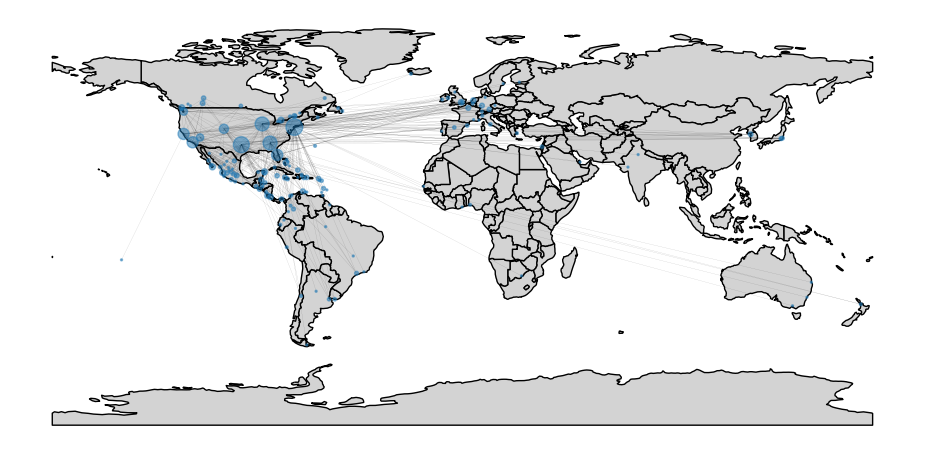

In [ ]:
# Map projection
fig, ax = plt.subplots(figsize=(12, 9))
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(ax=ax, color='lightgray', edgecolor='black')

nx.draw_networkx(spatial_network, ax=ax,
                 font_size=3,
                 alpha=.5,
                 width=.075,
                 node_size=sizes,
                 labels=labels,
                 pos=pos,
                 cmap=plt.cm.autumn)

# Customize the plot appearance
ax.set_axis_off()

# Show the plot
plt.show()

In [ ]:
months = [i+1 for i in range(12)]

In [ ]:
import networkx as nx
import pandas as pd
from typing import Dict, List

class TemporalNetwork(nx.DiGraph):
    """
    Class representing a temporal directed network.
    The class inherits from `DiGraph` and overrides the `to_undirected` method.
    """
    def __init__(self) -> None:
        super().__init__()

    def to_undirected(self) -> nx.Graph:
        """Function to turn the network from directed to undirected
        Resulting edges weights are obtained as the sum of the directed edges from u to v or v to u divided by their quantity.

        Returns
        -------
        Graph
            The undirected version of the original graph
        """
        undirected_network = nx.Graph()

        undirected_network.add_nodes_from(self.nodes)

        undirected_network.add_edges_from(self.edges(), mean_travel_time=0)

        for u, v, d in self.edges(data=True):
            undirected_network[u][v]['passengers'] += d['passengers']

        for u, v in undirected_network.edges():
            if self.has_edge(u, v) and self.has_edge(v, u):
                undirected_network[u][v]['passengers'] /= 2

        return undirected_network

In [ ]:
temporal_networks_dict = {
    m: nx.from_pandas_edgelist(
        gdf[gdf.month == m],
        source='airport_origin',
        target='airport_dest',
        edge_attr='passengers',
        create_using=TemporalNetwork()
        )
    for m in months
}

In [ ]:
for k, v in temporal_networks_dict.items():
   print(f'Temporal network at month {k}: nodes: {len(v.nodes())} edges: {len(v.edges())} density: {nx.density(v)}')

Temporal network at month 1: nodes: 77 edges: 156 density: 0.026657552973342446
Temporal network at month 2: nodes: 85 edges: 160 density: 0.022408963585434174
Temporal network at month 3: nodes: 83 edges: 164 density: 0.024096385542168676
Temporal network at month 4: nodes: 80 edges: 168 density: 0.026582278481012658
Temporal network at month 5: nodes: 90 edges: 167 density: 0.020848938826466917
Temporal network at month 6: nodes: 87 edges: 186 density: 0.024859663191659984
Temporal network at month 7: nodes: 88 edges: 161 density: 0.021029258098223615
Temporal network at month 8: nodes: 80 edges: 146 density: 0.023101265822784812
Temporal network at month 9: nodes: 82 edges: 150 density: 0.022583559168925023
Temporal network at month 10: nodes: 82 edges: 146 density: 0.021981330924420357
Temporal network at month 11: nodes: 92 edges: 156 density: 0.018633540372670808
Temporal network at month 12: nodes: 82 edges: 152 density: 0.022884673291177358


In [ ]:
for k, v in temporal_networks_dict.items():
    print(f'Temporal network at time {k} is directed: {nx.is_directed(v)}')

Temporal network at time 1 is directed: True
Temporal network at time 2 is directed: True
Temporal network at time 3 is directed: True
Temporal network at time 4 is directed: True
Temporal network at time 5 is directed: True
Temporal network at time 6 is directed: True
Temporal network at time 7 is directed: True
Temporal network at time 8 is directed: True
Temporal network at time 9 is directed: True
Temporal network at time 10 is directed: True
Temporal network at time 11 is directed: True
Temporal network at time 12 is directed: True


## Utils

In [ ]:
"""
MIT License

Copyright (c) 2020 Shuaib

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
"""
import networkx as nx

def weighted_hits(G, weight='weight', max_iter=1_000, tol=1.0e-8, nstart=None, normalized=True):
    """Returns HITS hubs and authorities values for nodes.
    The HITS algorithm computes two numbers for a node.
    Authorities estimates the node value based on the incoming links.
    Hubs estimates the node value based on outgoing links.
    Parameters
    ----------
    G : graph
      A NetworkX graph
    max_iter : integer, optional
      Maximum number of iterations in power method.
    tol : float, optional
      Error tolerance used to check convergence in power method iteration.
    nstart : dictionary, optional
      Starting value of each node for power method iteration.
    normalized : bool (default=True)
       Normalize results by the sum of all of the values.
    Returns
    -------
    (hubs,authorities) : two-tuple of dictionaries
       Two dictionaries keyed by node containing the hub and authority
       values.
    Raises
    ------
    PowerIterationFailedConvergence
        If the algorithm fails to converge to the specified tolerance
        within the specified number of iterations of the power iteration
        method.
    Examples
    --------
    >>> G = nx.path_graph(4)
    >>> h, a = nx.hits(G)
    Notes
    -----
    The eigenvector calculation is done by the power iteration method
    and has no guarantee of convergence.  The iteration will stop
    after max_iter iterations or an error tolerance of
    number_of_nodes(G)*tol has been reached.
    The HITS algorithm was designed for directed graphs but this
    algorithm does not check if the input graph is directed and will
    execute on undirected graphs.
    References
    ----------
    .. [1] A. Langville and C. Meyer,
       "A survey of eigenvector methods of web information retrieval."
       http://citeseer.ist.psu.edu/713792.html
    .. [2] Jon Kleinberg,
       Authoritative sources in a hyperlinked environment
       Journal of the ACM 46 (5): 604-32, 1999.
       doi:10.1145/324133.324140.
       http://www.cs.cornell.edu/home/kleinber/auth.pdf.
    """
    if type(G) == nx.MultiGraph or type(G) == nx.MultiDiGraph:
        raise Exception("hits() not defined for graphs with multiedges.")
    if len(G) == 0:
        return {}, {}
    # choose fixed starting vector if not given
    if nstart is None:
        h = dict.fromkeys(G, 1.0 / G.number_of_nodes())
    else:
        h = nstart
        # normalize starting vector
        s = 1.0 / sum(h.values())
        for k in h:
            h[k] *= s
    for _ in range(max_iter):  # power iteration: make up to max_iter iterations
        hlast = h
        h = dict.fromkeys(hlast.keys(), 0)
        a = dict.fromkeys(hlast.keys(), 0)
        # this "matrix multiply" looks odd because it is
        # doing a left multiply a^T=hlast^T*G
        for n in h:
            for nbr in G[n]:
                a[nbr] += hlast[n] * G[n][nbr][weight]
        # now multiply h=Ga
        for n in h:
            for nbr in G[n]:
                h[n] += a[nbr] * G[n][nbr][weight]
        # normalize vector
        s = 1.0 / max(h.values())
        for n in h:
            h[n] *= s
        # normalize vector
        s = 1.0 / max(a.values())
        for n in a:
            a[n] *= s
        # check convergence, l1 norm
        err = sum([abs(h[n] - hlast[n]) for n in h])
        if err < tol:
            break
    else:
        raise nx.PowerIterationFailedConvergence(max_iter)
    if normalized:
        s = 1.0 / sum(a.values())
        for n in a:
            a[n] *= s
        s = 1.0 / sum(h.values())
        for n in h:
            h[n] *= s
    return h, a

In [ ]:
"""
Edited from the Networkx Documentation

Edits list:
- Addition of types
- Addition of extra parameters or controls in some functions to allow the use of weights
"""

from collections import defaultdict
from statistics import geometric_mean
import networkx as nx

def k_clique_communities(G: nx.Graph, weight: str, k: int = 2, l: float = 100):
    """Find k-clique communities in graph using the percolation method.

    A k-clique community is the union of all cliques of size k that
    can be reached through adjacent (sharing k-1 nodes) k-cliques.

    Parameters
    ----------
    G : NetworkX graph

    weigth : str
        Weight to use to compute k-clique

    k : int
       Size of smallest clique

    cliques: list or generator
       Precomputed cliques (use networkx.find_cliques(G))

    Returns
    -------
    Yields sets of nodes, one for each k-clique community.

    Examples
    --------
    >>> from networkx.algorithms.community import k_clique_communities
    >>> G = nx.complete_graph(5)
    >>> K5 = nx.convert_node_labels_to_integers(G, first_label=2)
    >>> G.add_edges_from(K5.edges())
    >>> c = list(k_clique_communities(G, 4))
    >>> sorted(list(c[0]))
    [0, 1, 2, 3, 4, 5, 6]
    >>> list(k_clique_communities(G, 6))
    []

    References
    ----------
    .. [1] Gergely Palla, Imre Derényi, Illés Farkas1, and Tamás Vicsek,
       Uncovering the overlapping community structure of complex networks
       in nature and society Nature 435, 814-818, 2005,
       doi:10.1038/nature03607
    """
    if k < 2:
        raise nx.NetworkXError(f"k={k}, k must be greater than 1.")

    cliques_ = nx.find_cliques(G)

    cliques = []

    for c in cliques_:
        subgraph = G.subgraph(c)
        try:
            gm = geometric_mean([w[weight] for _, _, w in subgraph.edges(data=True)])
        except:
            gm = 0
        if len(c) >= k and gm >= l:
            cliques.append(frozenset(c))

    # cliques = [frozenset(c) for c in cliques if len(c) >= k (multiply_values)**(1/n)]

    # First index which nodes are in which cliques
    membership_dict = defaultdict(list)
    for clique in cliques:
        for node in clique:
            membership_dict[node].append(clique)

    # For each clique, see which adjacent cliques percolate
    perc_graph = nx.Graph()
    perc_graph.add_nodes_from(cliques)
    for clique in cliques:
        for adj_clique in _get_adjacent_cliques(clique, membership_dict):
            if len(clique.intersection(adj_clique)) >= (k - 1):
                perc_graph.add_edge(clique, adj_clique)

    # Connected components of clique graph with perc edges
    # are the percolated cliques
    for component in nx.connected_components(perc_graph):
        yield (frozenset.union(*component))



def _get_adjacent_cliques(clique, membership_dict):
    adjacent_cliques = set()
    for n in clique:
        for adj_clique in membership_dict[n]:
            if clique != adj_clique:
                adjacent_cliques.add(adj_clique)
    return adjacent_cliques

In [ ]:
"""
Edited from the Networkx Documentation

Find the k-cores of a graph.

The k-core is found by recursively pruning nodes with degrees less than k.

See the following references for details:

An O(m) Algorithm for Cores Decomposition of Networks
Vladimir Batagelj and Matjaz Zaversnik, 2003.
https://arxiv.org/abs/cs.DS/0310049

Generalized Cores
Vladimir Batagelj and Matjaz Zaversnik, 2002.
https://arxiv.org/pdf/cs/0202039

For directed graphs a more general notion is that of D-cores which
looks at (k, l) restrictions on (in, out) degree. The (k, k) D-core
is the k-core.

D-cores: Measuring Collaboration of Directed Graphs Based on Degeneracy
Christos Giatsidis, Dimitrios M. Thilikos, Michalis Vazirgiannis, ICDM 2011.
http://www.graphdegeneracy.org/dcores_ICDM_2011.pdf

Multi-scale structure and topological anomaly detection via a new network \
statistic: The onion decomposition
L. Hébert-Dufresne, J. A. Grochow, and A. Allard
Scientific Reports 6, 31708 (2016)
http://doi.org/10.1038/srep31708

Edits list:
- Addition of types
- Addition of extra parameters or controls in some functions to allow the use of weights
- Function `core_number_weighted` created from scratch.

"""
import networkx as nx
from networkx.exception import NetworkXError
from networkx.utils import not_implemented_for
from typing import Callable, Dict, Optional

def core_number_weighted(network: nx.Graph, weight: str) -> Dict[str, float]:
    """Get the weighted core number of each node in the network

    Parameters
    ----------
    network : Graph
        The mnetwork from which the core numbers are obtained
    weight : str
        The name of the weight on the edges that has to be used to compute the weighted core number of the nodes

    Returns
    -------
    { str: float }
        Dictionary containing for each node its weighted core number
    """
    # Get weighted node degree dictionary.
    degrees = dict(network.degree(weight=weight))
    # Sort nodes by non-decreasing degree.
    nodes = sorted(degrees, key=degrees.get)

    # Initialize core_number dictionary
    cores = {k: 0 for k in nodes}

    for i in range(len(nodes)):
        # Get current node
        u = nodes[i]
        # Initialize its core value as its degree
        cores[u] = degrees[u]
        # Update neighbouring nodes core number
        for w in list(nx.all_neighbors(network, u)):
            if cores[u] < degrees[w]:
                degrees[w] = max(degrees[w] - network[u][w][weight], cores[u])
        nodes[i+1:] = sorted({k: v for k, v in degrees.items() if k in nodes[i+1:]}, key=degrees.get)

    return cores


#@nx._dispatch
@not_implemented_for("multigraph")
def core_number(G: nx.Graph):
    """Returns the core number for each vertex.

    A k-core is a maximal subgraph that contains nodes of degree k or more.

    The core number of a node is the largest value k of a k-core containing
    that node.

    Parameters
    ----------
    G : NetworkX graph
       A graph or directed graph

    Returns
    -------
    core_number : dictionary
       A dictionary keyed by node to the core number.

    Raises
    ------
    NetworkXError
        The k-core is not implemented for graphs with self loops
        or parallel edges.

    Notes
    -----
    Not implemented for graphs with parallel edges or self loops.

    For directed graphs the node degree is defined to be the
    in-degree + out-degree.

    References
    ----------
    .. [1] An O(m) Algorithm for Cores Decomposition of Networks
       Vladimir Batagelj and Matjaz Zaversnik, 2003.
       https://arxiv.org/abs/cs.DS/0310049
    """
    if nx.number_of_selfloops(G) > 0:
        msg = (
            "Input graph has self loops which is not permitted; "
            "Consider using G.remove_edges_from(nx.selfloop_edges(G))."
        )
        raise NetworkXError(msg)
    degrees = dict(G.degree())
    # Sort nodes by degree.
    nodes = sorted(degrees, key=degrees.get)
    bin_boundaries = [0]
    curr_degree = 0
    for i, v in enumerate(nodes):
        if degrees[v] > curr_degree:
            bin_boundaries.extend([i] * (degrees[v] - curr_degree))
            curr_degree = degrees[v]
    node_pos = {v: pos for pos, v in enumerate(nodes)}
    # The initial guess for the core number of a node is its degree.
    core = degrees
    nbrs = {v: list(nx.all_neighbors(G, v)) for v in G}
    for v in nodes:
        for u in nbrs[v]:
            if core[u] > core[v]:
                nbrs[u].remove(v)
                pos = node_pos[u]
                bin_start = bin_boundaries[core[u]]
                node_pos[u] = bin_start
                node_pos[nodes[bin_start]] = pos
                nodes[bin_start], nodes[pos] = nodes[pos], nodes[bin_start]
                bin_boundaries[core[u]] += 1
                core[u] -= 1
    return core



def _core_subgraph(G: nx.Graph, k_filter: Callable[[float, float, Dict[str, float]],bool], k: Optional[float] = None,
                   core: Optional[Dict[str, float]] = None, weight: Optional[str] = None) -> nx.Graph:
    """Returns the subgraph induced by nodes passing filter `k_filter`.

    Parameters
    ----------
    G : NetworkX graph
       The graph or directed graph to process
    k_filter : filter function
       This function filters the nodes chosen. It takes three inputs:
       A node of G, the filter's cutoff, and the core dict of the graph.
       The function should return a Boolean value.
    k : int, optional
      The order of the core. If not specified use the max core number.
      This value is used as the cutoff for the filter.
    core : dict, optional
      Precomputed core numbers keyed by node for the graph `G`.
      If not specified, the core numbers will be computed from `G`.
    weight : str, optional
      The name of the weight on the edges that has to be used to compute the weighted core number of the nodes
    """
    if core is None:
        if weight is None:
          core = core_number(G)
        else:
          core = core_number_weighted(G, weight)
    if k is None:
        k = sum(core.values()) / len(core)
    nodes = (v for v in core if k_filter(v, k, core))
    return G.subgraph(nodes).copy()

def k_core(G: nx.Graph, k: Optional[float] =None, core_number: Optional[Optional[Dict[str, float]]] = None,
           weight: Optional[str] = None) -> nx.Graph:
    """Returns the k-core of G.

    A k-core is a maximal subgraph that contains nodes of degree k or more.

    Parameters
    ----------
    G : NetworkX graph
      A graph or directed graph
    k : int, optional
      The order of the core.  If not specified return the main core.
    core_number : dictionary, optional
      Precomputed core numbers for the graph G.
    weight : str, optional
      The weight used to compute the k-core

    Returns
    -------
    G : NetworkX graph
      The k-core subgraph

    Raises
    ------
    NetworkXError
      The k-core is not defined for graphs with self loops or parallel edges.

    Notes
    -----
    The main core is the core with the largest degree.

    Not implemented for graphs with parallel edges or self loops.

    For directed graphs the node degree is defined to be the
    in-degree + out-degree.

    Graph, node, and edge attributes are copied to the subgraph.

    See Also
    --------
    core_number

    References
    ----------
    .. [1] An O(m) Algorithm for Cores Decomposition of Networks
       Vladimir Batagelj and Matjaz Zaversnik,  2003.
       https://arxiv.org/abs/cs.DS/0310049
    """

    def k_filter(v, k, c):
        return c[v] >= k

    return _core_subgraph(G, k_filter, k, core_number, weight)

from copy import deepcopy
import networkx as nx
from statistics import geometric_mean
from typing import Dict, Optional, Tuple

def _normalize_metric(metric_dict: Dict[str, float]) -> Dict[str, float]:
    """Function to normalize the metric across the whole dictionary according to min-max scale.

    Parameters
    ----------
    metric_dict : { str: float }
        Dictionary to normalize where the keys are nodes and the values the relative metrics results.

    Returns
    -------
    { str: float }
        The normalized dictionary.
    """
    return { n: (v - min(metric_dict.values())) / (max(metric_dict.values()) - min(metric_dict.values()))
                for n, v in metric_dict.items() }

def get_nodes_in_degree_centrality(network: nx.Graph, normalize: bool = True,
                                   weight: Optional[str] = None) -> Dict[str, float]:
    """Get the in-degree centrality of all the nodes in the network.

    Parameters
    ----------
    network : Graph
        The network for which the centrality of the nodes is computed.
    normalize : bool, optional
        Whether to normalize or not the centrality results by min-max scale, by default True
    weight : str, optional
        The edge weight to use to compute the centrality measures, by default None

    Returns
    -------
    { str: float }
        Dictionary where the keys are nodes and the values the relative centrality values.
    """
    metric_dict = { n: network.in_degree(n, weight=weight) for n in network.nodes() }
    return metric_dict if not normalize else _normalize_metric(metric_dict)

def get_nodes_out_degree_centrality(network: nx.Graph, normalize: bool = True,
                                    weight: Optional[str] = None) -> Dict[str, float]:
    """Get the out-degree centrality of all the nodes in the network.

    Parameters
    ----------
    network : Graph
        The network for which the centrality of the nodes is computed.
    normalize : bool, optional
        Whether to normalize or not the centrality results by min-max scale, by default True
    weight : str, optional
        The edge weight to use to compute the centrality measures, by default None

    Returns
    -------
    { str: float }
        Dictionary where the keys are nodes and the values the relative centrality values.
    """
    metric_dict = { n: network.out_degree(n, weight=weight) for n in network.nodes() }
    return metric_dict if not normalize else _normalize_metric(metric_dict)

def get_nodes_betweenness_centrality(network: nx.Graph, normalize: bool = True, weight: Optional[str] = None,
                                     seed: int = 42) -> Dict[str, float]:
    """Get the betweenness centrality of all the nodes in the network.

    Parameters
    ----------
    network : Graph
        The network for which the centrality of the nodes is computed.
    normalize : bool, optional
        Whether to normalize or not the centrality results by min-max scale, by default True.
    weight : str, optional
        The edge weight to use to compute the centrality measures, by default None.
    seed : int, optional
        The seed to use, by default 42.

    Returns
    -------
    { str: float }
        Dictionary where the keys are nodes and the values the relative centrality values.
    """
    metric_dict = nx.betweenness_centrality(network, k=None, normalized=False, weight=weight, endpoints=False, seed=seed)
    return metric_dict if not normalize else _normalize_metric(metric_dict)

def get_nodes_closeness_centrality(network: nx.Graph, normalize: bool = True,
                                   weight: Optional[str] = None) -> Dict[str, float]:
    """Get the closeness centrality of all the nodes in the network.

    Parameters
    ----------
    network : Graph
        The network for which the centrality of the nodes is computed.
    normalize : bool, optional
        Whether to normalize or not the centrality results by min-max scale, by default True
    weight : str, optional
        The edge weight to use to compute the centrality measures, by default None

    Returns
    -------
    { str: float }
        Dictionary where the keys are nodes and the values the relative centrality values.
    """
    metric_dict = nx.closeness_centrality(network, u=None, distance=weight)
    return metric_dict if not normalize else _normalize_metric(metric_dict)

def get_nodes_pagerank_centrality(network: nx.Graph, normalize: bool = True,
                                  weight: Optional[str] = None) -> Dict[str, float]:
    """Get the PageRank centrality of all the nodes in the network.

    Parameters
    ----------
    network : Graph
        The network for which the centrality of the nodes is computed.
    normalize : bool, optional
        Whether to normalize or not the centrality results by min-max scale, by default True
    weight : str, optional
        The edge weight to use to compute the centrality measures, by default None

    Returns
    -------
    { str: float }
        Dictionary where the keys are nodes and the values the relative centrality values.
    """
    metric_dict = nx.pagerank(network, alpha=0.85, max_iter=100, tol=1e-06, nstart=None, weight=weight, dangling=None)
    return metric_dict if not normalize else _normalize_metric(metric_dict)

def get_nodes_hits_centrality(network: nx.Graph, normalize: bool = True,
                              weight: Optional[str] = None) -> Tuple[Dict[str, float], Dict[str, float]]:
    """Get the HITS centrality (Hubs and Authorities) of all the nodes in the network.

    Parameters
    ----------
    network : Graph
        The network for which the centrality of the nodes is computed.
    normalize : bool, optional
        Whether to normalize or not the centrality results by min-max scale, by default True
    weight : str, optional
        The edge weight to use to compute the centrality measures, by default None

    Returns
    -------
    { str: float }
        Dictionary where the keys are nodes and the values the relative centrality values.
    """
    metric_dict = weighted_hits(network, normalized=normalize, weight=weight)
    return metric_dict

def normalize_centrality_measures(centrality_dict: Dict[int, Dict[str, float]]) -> Dict[int, Dict[str, float]]:
    """Function to normalize with min-max scale the centrality measures across a dictionary of dictionaries of metrics results

    Parameters
    ----------
    centrality_dict : { int : { str : float } }
        The dictionary of dictionaries of metrics.

    Returns
    -------
    { int : { str : float } }
        The normalized dictionary
    """
    centrality_dict = deepcopy(centrality_dict)

    values_list = [v for centralities in centrality_dict.values() for v in centralities.values()]
    min_value = min(values_list)
    max_value = max(values_list)

    for centralities in centrality_dict.values():
        for k, v in centralities.items():
            centralities[k] = (v - min_value) / (max_value - min_value)

    return centrality_dict

def get_girvan_newman_communities(network: nx.Graph, weight: Optional[str] = None, k: int = 2,
                                  seed: int = 42) -> Dict[str, int]:
    """Function to get the Girvan-Newmann partition from a network.

    Parameters
    ----------
    network : Graph
        The network from which the communities are obtained.
    weight : str, optional
        The edge weight to use to compute the communities, by default None.
    k : int, optional
        How many communities to find, by default 2
    seed : int, optional
        The seed to use, by default 42

    Returns
    -------
    { str: int }
        Dictionary describing for each node (key) the relative community (value).
    """
    def most_central_edge(network: nx.Graph):
        centrality = nx.edge_betweenness_centrality(network, weight=weight, seed=seed)
        return max(centrality, key=centrality.get)

    communities_iterator = nx.community.girvan_newman(network, most_valuable_edge=most_central_edge)

    for _ in range(k - 1):
        communities = next(communities_iterator)

    return { c: i for i, community in enumerate(communities) for c in community }

def get_k_cores_communities(network: nx.Graph, weight: Optional[str] = None, k: Optional[int] = None) -> Dict[str, int]:
    """Function to get the k-core partition from a network.

    Parameters
    ----------
    network : Graph
        The network from which the communities are obtained.
    weight : str, optional
        The edge weight to use to compute the communities, by default None.
    k : int, optional
        The core number that the nodes must reach to be part od a community, by default None.
        If None, it will be initialized as the geometric mean of all edges of the network.

    Returns
    -------
    { str: int }
        Dictionary describing for each node (key) the relative community (value).
    """
    new_network = deepcopy(network)
    node_cores_dict = {}
    n = 0

    while len(new_network.nodes()):
        try:
            k_core_subgraph = k_core(new_network, k=k, weight=weight)
        except ValueError:
            break

        for node in k_core_subgraph.nodes():
            node_cores_dict[node] = n
            new_network.remove_node(node)

        n += 1

    for node in new_network.nodes():
        node_cores_dict[node] = n

    return node_cores_dict

def get_clique_percolation_communities(network: nx.Graph, k: Optional[int] = 2,
                                       weight: Optional[str] = None) -> Dict[str, int]:
    """Function to get the Clique Percolation partition from a network.

    Parameters
    ----------
    network : Graph
        The network from which the communities are obtained.
    weight : str, optional
        The edge weight to use to compute the communities, by default None.
    k : int, optional
        The minimum clique size to consider, by default 2.

    Returns
    -------
    { str: int }
        Dictionary describing for each node (key) the relative community (value).
    """
    new_network = deepcopy(network)
    n = 0
    communities = dict()

    while len(new_network.nodes()):
        try:
            l = geometric_mean([d[weight] for _, _, d in new_network.edges(data=True)])
        except:
            l = 0

        community_iterator = k_clique_communities(new_network, weight=weight, l=l, k=k)
        all_cliques = list(community_iterator)
        if len(all_cliques) == 0:
            break
        for clique in all_cliques:
            for c in clique:
                communities[c] = n
                if new_network.has_node(c):
                    new_network.remove_node(c)
            n += 1

    for node in new_network.nodes():
        communities[node] = n

    return communities

def get_louvain_communities(network: nx.Graph, weight: Optional[str] = None) -> Dict[str, int]:
    """Function to get the Louvain partition from a network.

    Parameters
    ----------
    network : Graph
        The network from which the communities are obtained.
    weight : str, optional
        The edge weight to use to compute the communities, by default None.

    Returns
    -------
    { str: int }
        Dictionary describing for each node (key) the relative community (value).
    """
    communities = nx.community.louvain_communities(network, weight=weight, resolution=1, threshold=1e-07, seed=42)
    return { c: i for i, community in enumerate(communities) for c in community }

def get_modularity_score(network: nx.Graph, node_community_dict: Dict[str, int], weight: str) -> float:
    """Function to get the modularity score of a network partition.

    Parameters
    ----------
    network : Graph
        The network partition
    node_community_dict : { str: int }
        Dictionary describing for each node (key) the relative partition (value).
    weight : str
        The edge weight to use to compute the odularity score.

    Returns
    -------
    float
        The modularity score.
    """
    communities_labels = set(node_community_dict.values())
    communities = {l: [] for l in communities_labels}
    for k, v in node_community_dict.items():
        communities[v].append(k)
    return nx.community.modularity(network, communities.values(), weight=weight)

## Temporal Centrality (copia da riccardo)

In [ ]:
temporal_networks_in_degrees = {
    k: get_nodes_in_degree_centrality(v, weight='passengers', normalize=False)
    for k, v in temporal_networks_dict.items()
}

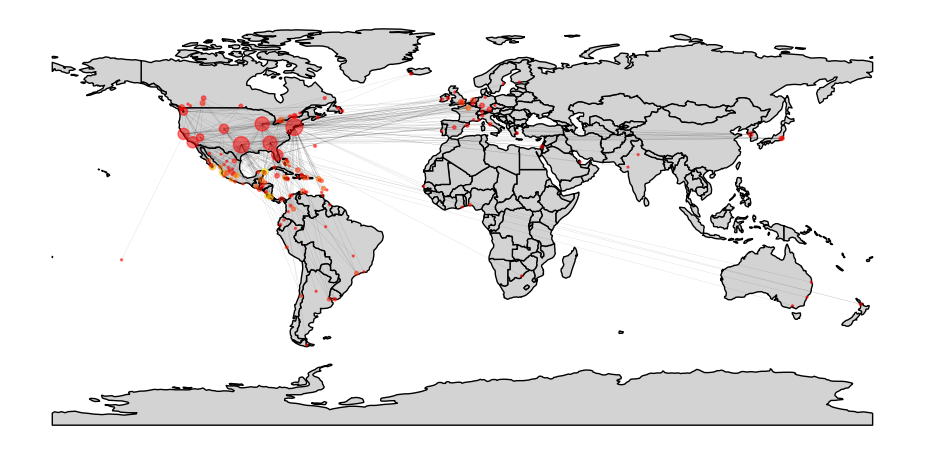

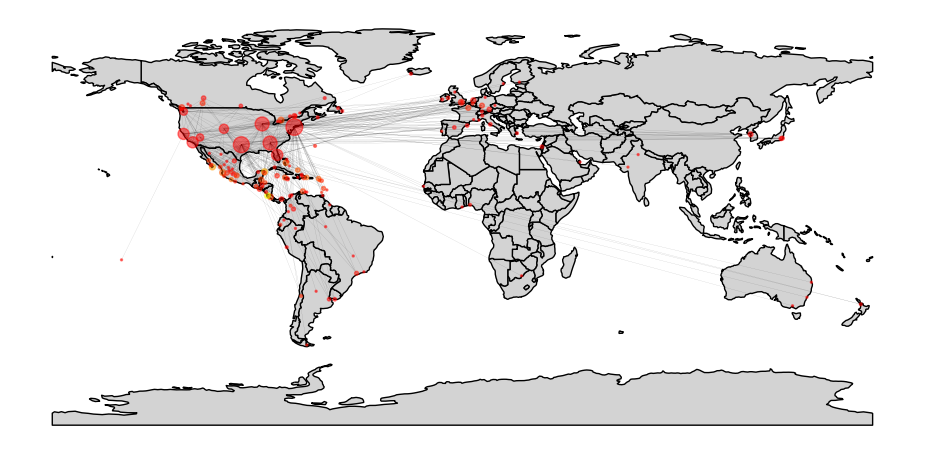

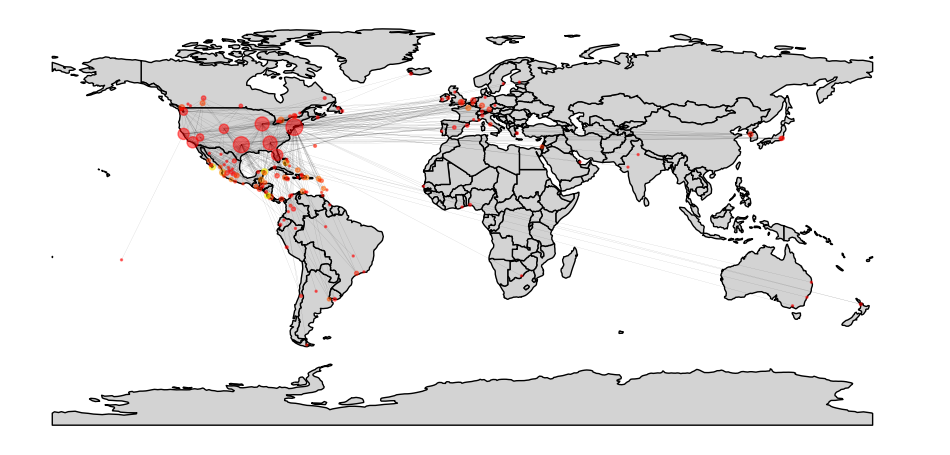

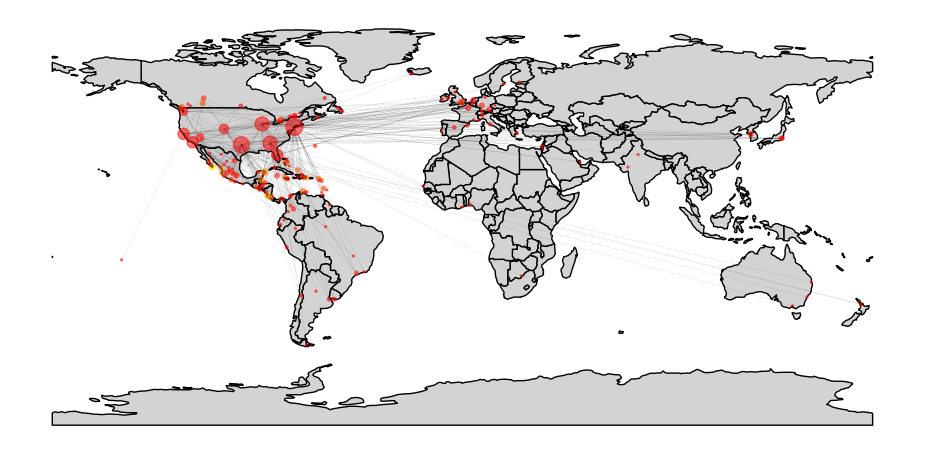

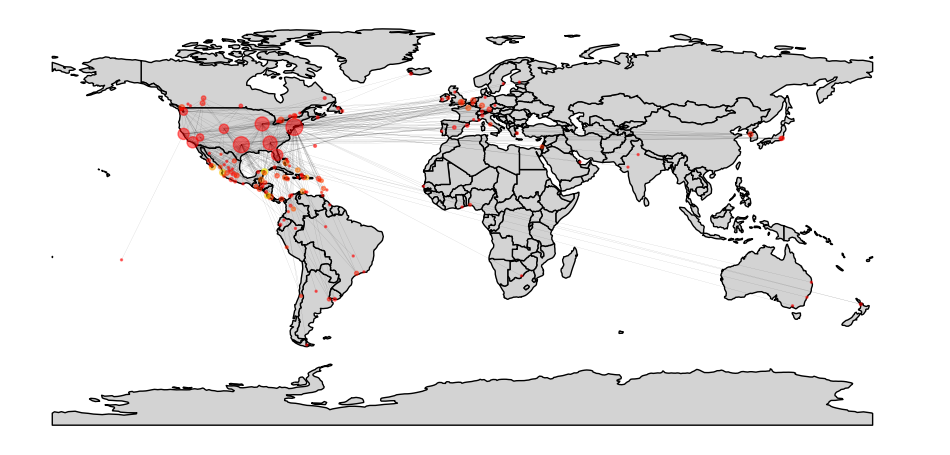

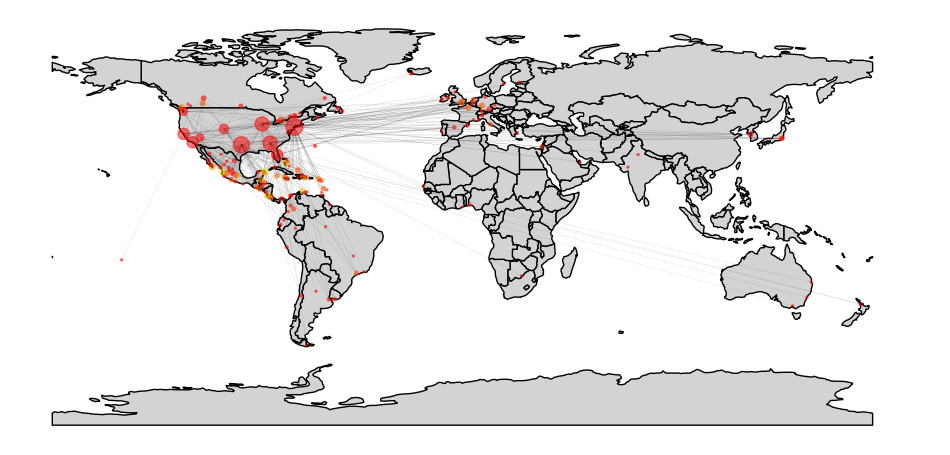

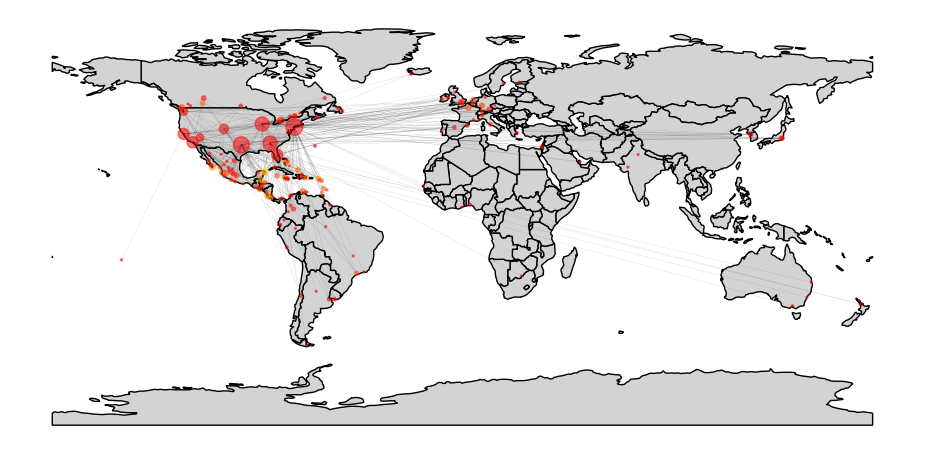

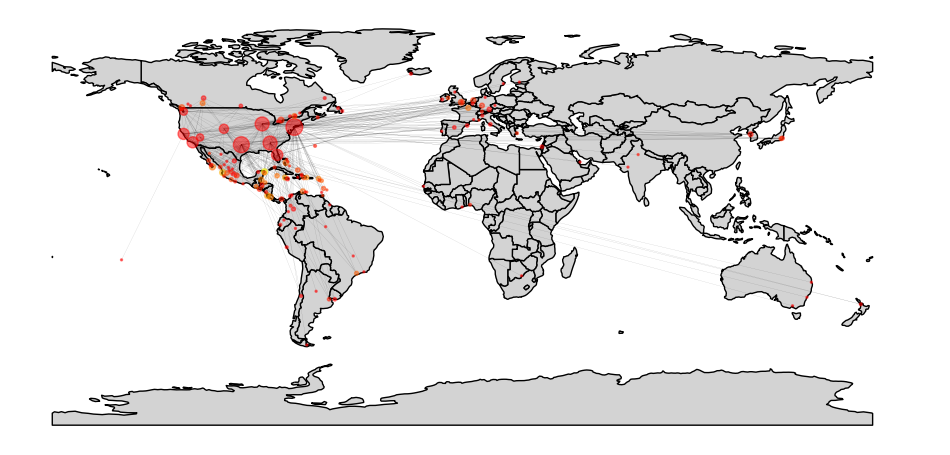

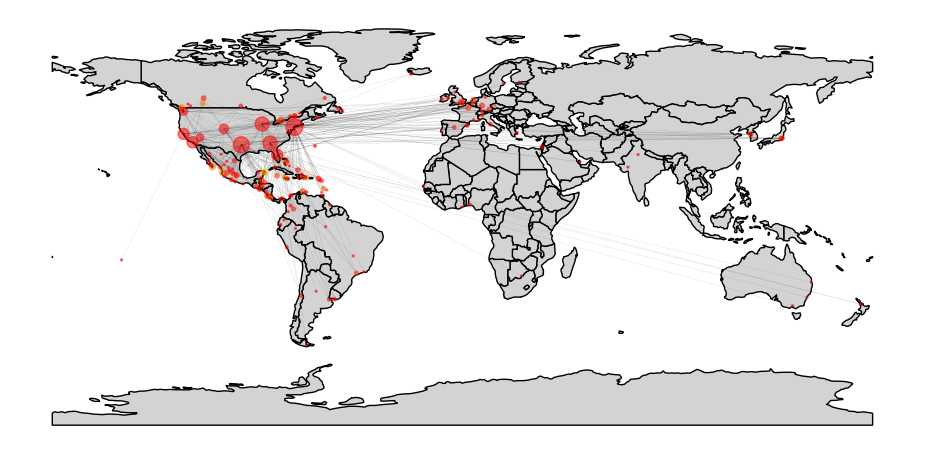

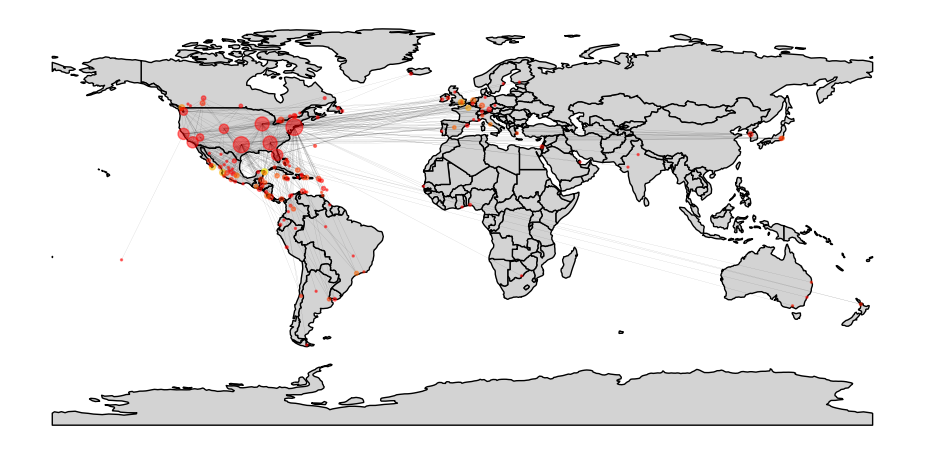

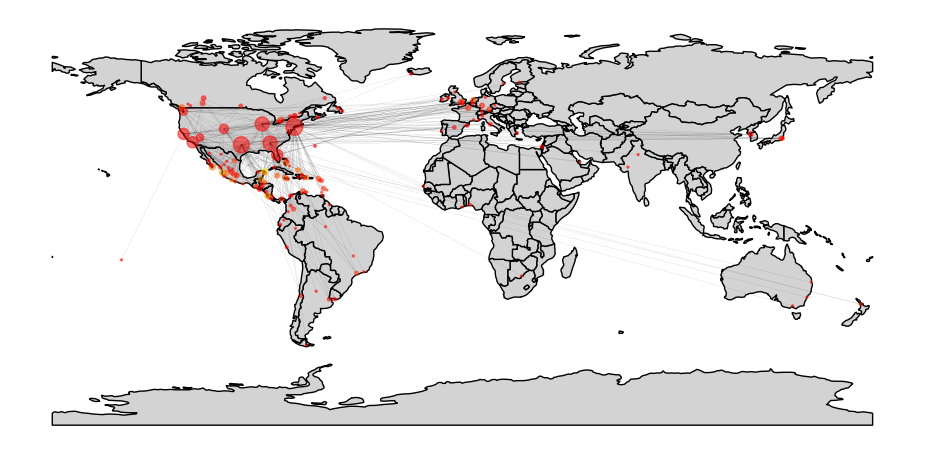

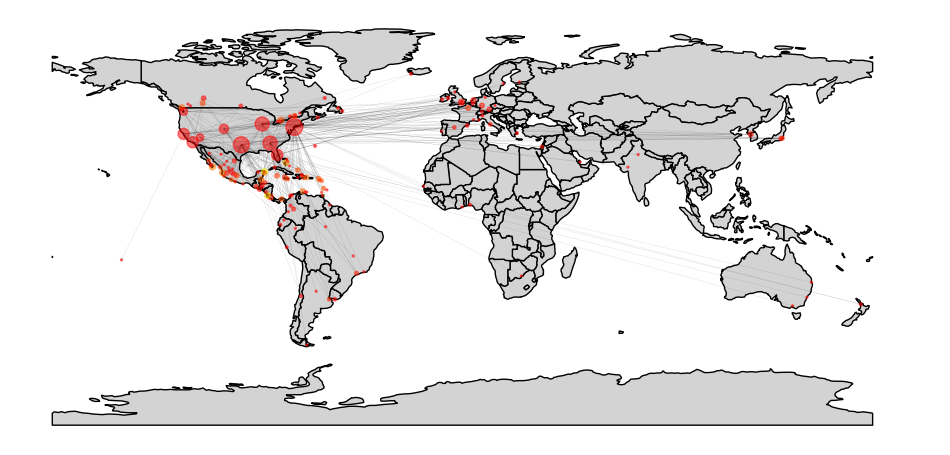

In [ ]:
for k, v in temporal_networks_in_degrees.items():
    # Map projection
    fig, ax = plt.subplots(figsize=(12, 9))
    countries = gpd.read_file(
                  gpd.datasets.get_path("naturalearth_lowres"))
    countries.plot(ax=ax, color='lightgray', edgecolor='black')
    node_color = [v[n] if n in v.keys() else 0 for n in spatial_network.nodes()]
    nx.draw_networkx(spatial_network, ax=ax,
                    node_color=node_color,
                    font_size=3,
                    alpha=.5,
                    width=.075,
                    node_size=sizes,
                    labels=labels,
                    pos=pos,
                    cmap=plt.cm.autumn)

    # Customize the plot appearance
    ax.set_axis_off()

    # Show the plot
    plt.show()

In [ ]:
temporal_networks_betweenness = {
    k: get_nodes_betweenness_centrality(v, weight='passengers', normalize=False)
    for k, v in temporal_networks_dict.items()
}

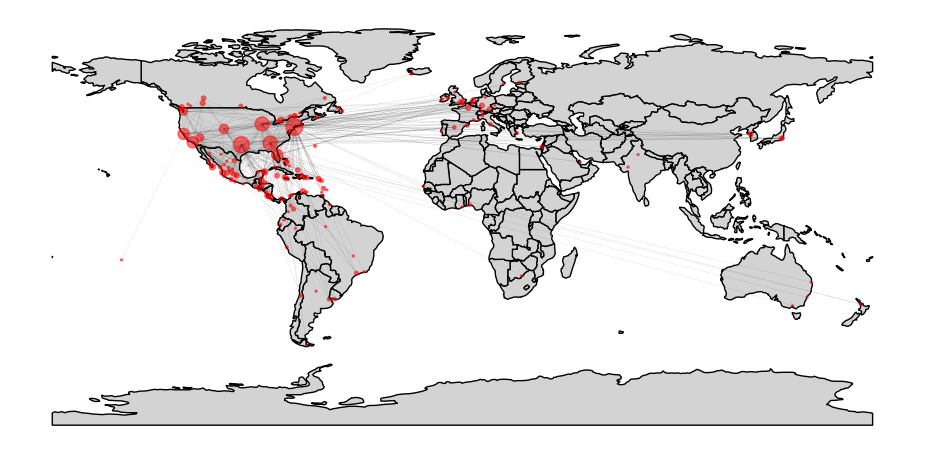

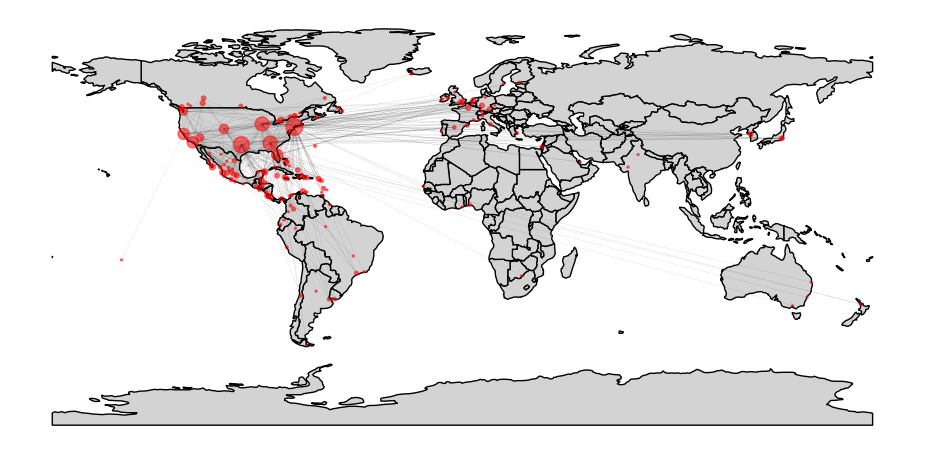

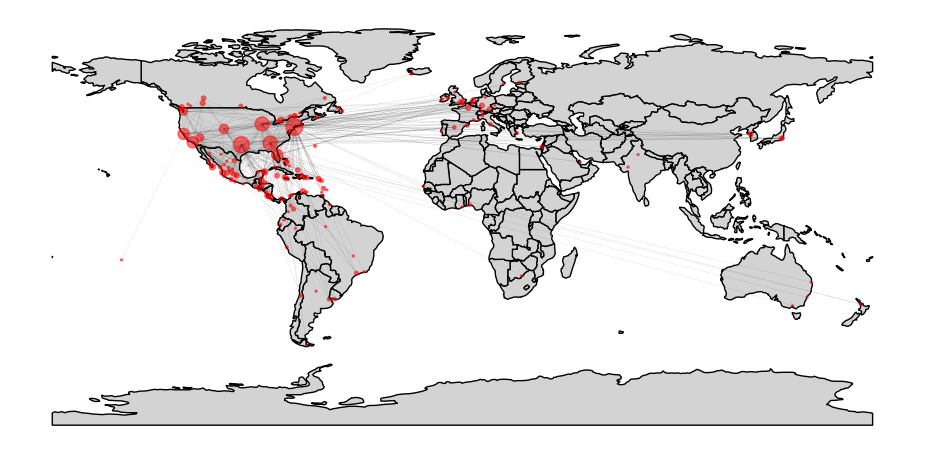

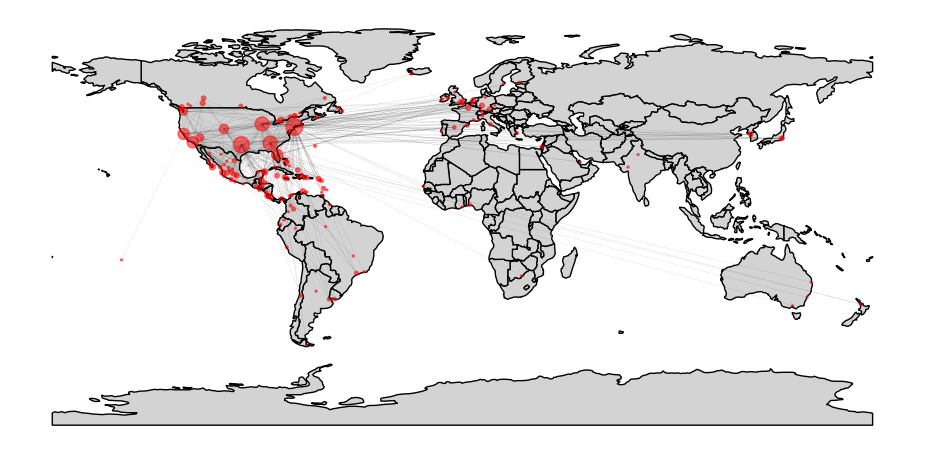

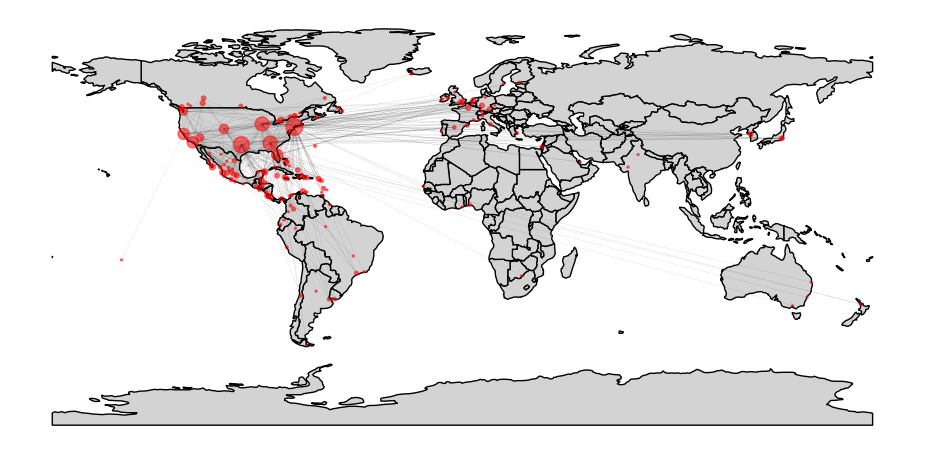

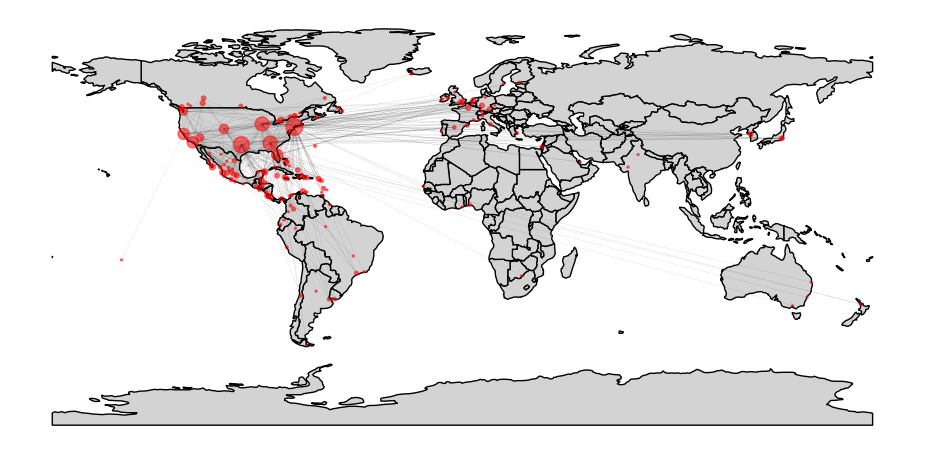

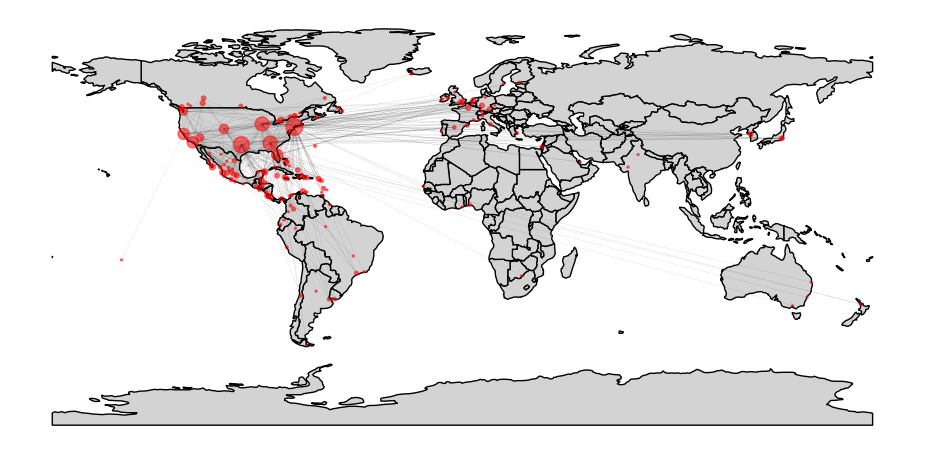

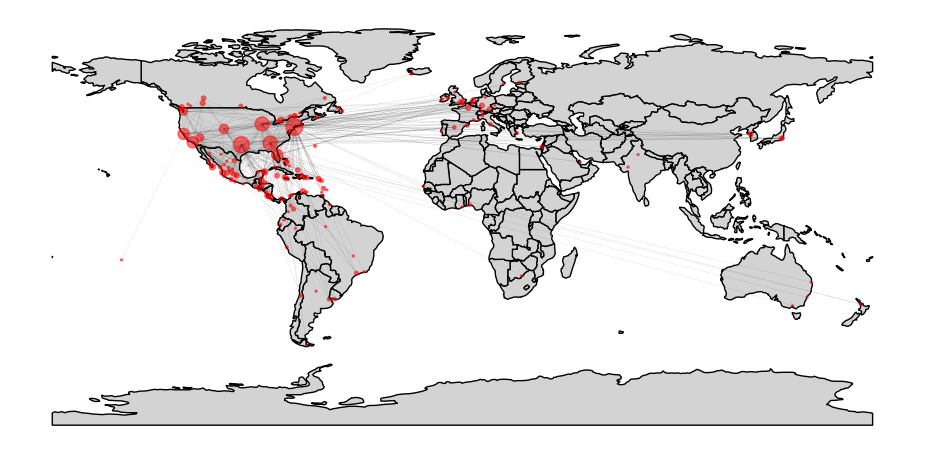

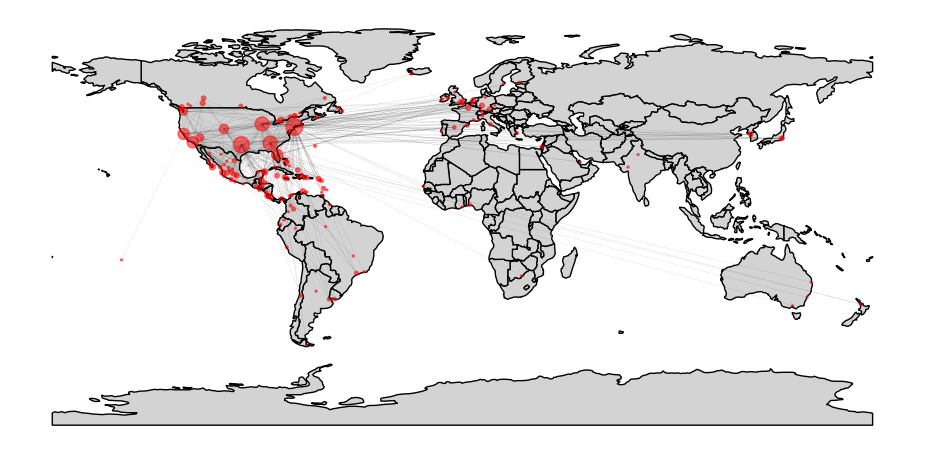

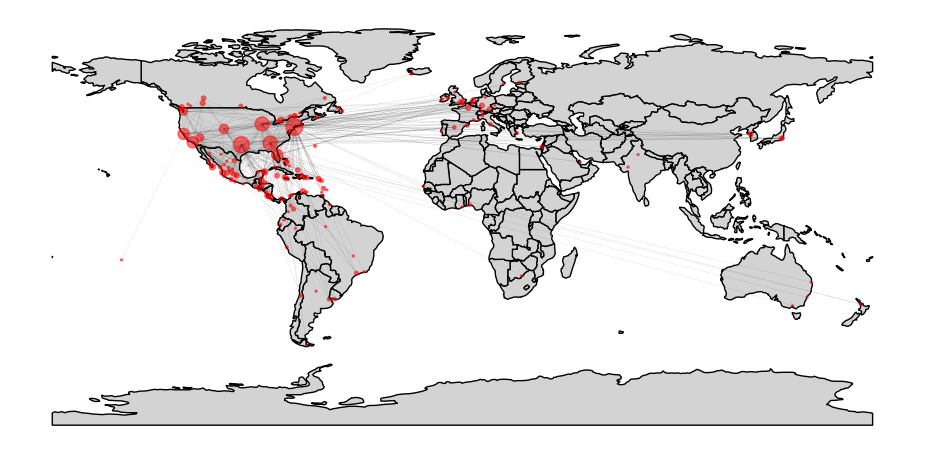

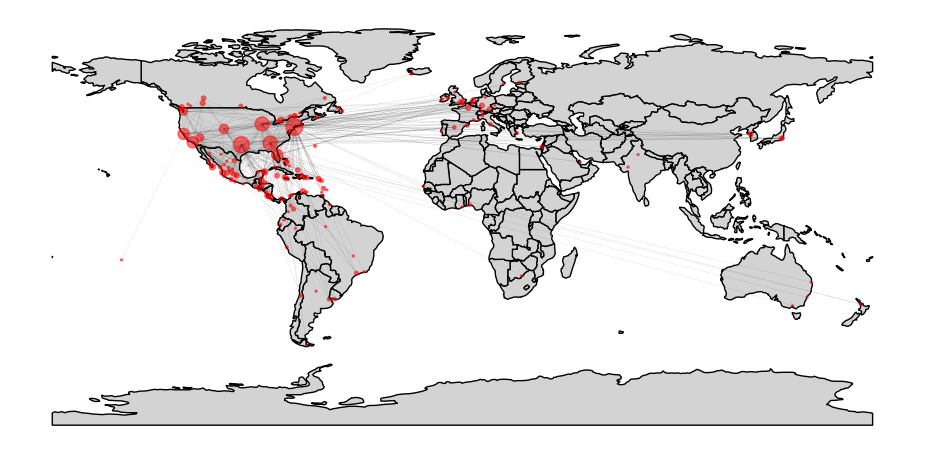

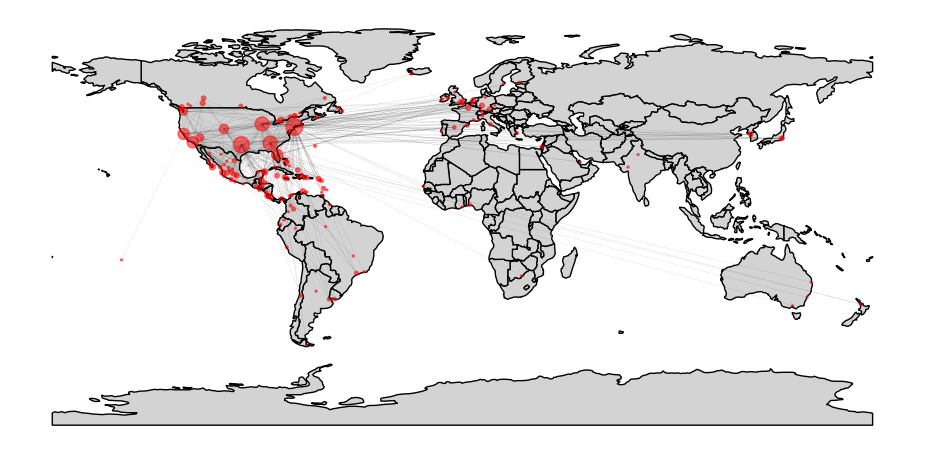

In [ ]:
for k, v in temporal_networks_betweenness.items():
    # Map projection
    fig, ax = plt.subplots(figsize=(12, 9))
    countries = gpd.read_file(
                  gpd.datasets.get_path("naturalearth_lowres"))
    countries.plot(ax=ax, color='lightgray', edgecolor='black')
    node_color = [v[n] if n in v.keys() else 0 for n in spatial_network.nodes()]
    nx.draw_networkx(spatial_network, ax=ax,
                    node_color=node_color,
                    font_size=3,
                    alpha=.5,
                    width=.075,
                    node_size=sizes,
                    labels=labels,
                    pos=pos,
                    cmap=plt.cm.autumn)

    # Customize the plot appearance
    ax.set_axis_off()

    # Show the plot
    plt.show()